In [8]:
from numpy import *
import matplotlib.pyplot as plt
import operator
import time

INF = 9999999.0

def loadDataSet(fileName, splitChar='\t'):
    """
    输入：文件名
    输出：数据集
    描述：从文件读入数据集
    """
    dataSet = []
    with open(fileName) as fr:
        for line in fr.readlines():
            curline = line.strip().split(splitChar)
            fltline = list(map(float, curline))
            dataSet.append(fltline)
    return dataSet

def createDataSet():
    """
    输出：数据集
    描述：生成数据集
    """
    dataSet = [[0.0, 2.0],
               [0.0, 0.0],
               [1.5, 0.0],
               [5.0, 0.0],
               [5.0, 2.0]]
    return dataSet

def distEclud(vecA, vecB):
    """
    输入：向量A, 向量B
    输出：两个向量的欧式距离
    """
    return sqrt(sum(power(vecA - vecB, 2)))

def randCent(dataSet, k):
    """
    输入：数据集, 聚类个数
    输出：k个随机质心的矩阵
    """
    n = shape(dataSet)[1]
    centroids = mat(zeros((k, n)))
    for j in range(n):
        minJ = min(dataSet[:, j])
        rangeJ = float(max(dataSet[:, j]) - minJ)
        centroids[:, j] = minJ + rangeJ * random.rand(k, 1)
    return centroids

def kMeans(dataSet, k, distMeans=distEclud, createCent=randCent):
    """
    输入：数据集, 聚类个数, 距离计算函数, 生成随机质心函数
    输出：质心矩阵, 簇分配和距离矩阵
    """
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m, 2)))
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m): # 寻找最近的质心
            minDist = INF
            minIndex = -1
            for j in range(k):
                distJI = distMeans(centroids[j, :], dataSet[i, :])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssment[i, :] = minIndex, minDist**2
        for cent in range(k): # 更新质心的位置
            ptsInClust = dataSet[nonzero(clusterAssment[:, 0].A == cent)[0]]
            centroids[cent, :] = mean(ptsInClust, axis=0)
    return centroids, clusterAssment

def plotFeature(dataSet, centroids, clusterAssment):
    m = shape(centroids)[0]
    fig = plt.figure()
    scatterMarkers = ['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<']
    scatterColors = ['blue', 'green', 'yellow', 'purple', 'orange', 'black', 'brown']
    ax = fig.add_subplot(111)
    for i in range(m):
        ptsInCurCluster = dataSet[nonzero(clusterAssment[:, 0].A == i)[0], :]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        colorSytle = scatterColors[i % len(scatterColors)]
        ax.scatter(ptsInCurCluster[:, 0].flatten().A[0], ptsInCurCluster[:, 1].flatten().A[0], marker=markerStyle, c=colorSytle, s=90)
    ax.scatter(centroids[:, 0].flatten().A[0], centroids[:, 1].flatten().A[0], marker='+', c='red', s=300)

def main():
    #dataSet = loadDataSet('testSet2.txt')
    dataSet = loadDataSet('788points.txt', splitChar=',')
    #dataSet = createDataSet()
    dataSet = mat(dataSet)
    resultCentroids, clustAssing = kMeans(dataSet, 6)
    print('*******************')
    print(resultCentroids)
    print('*******************')
    plotFeature(dataSet, resultCentroids, clustAssing)


    

*******************
[[21.28723404 22.99893617]
 [ 9.50503876  7.55620155]
 [ 9.29464286 22.95267857]
 [33.14278846  8.79375   ]
 [18.8620283   7.11037736]
 [32.69453125 22.13789062]]
*******************
finish all in 1.624257


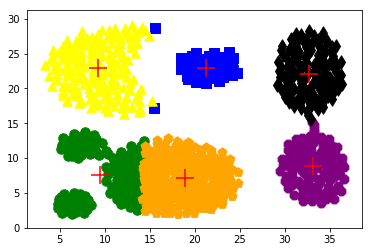

In [10]:
start = time.clock()
main()
end = time.clock()
print('finish all in %s' % str(end - start))
plt.show()